<a href="https://colab.research.google.com/github/Shankars57/Deep_Learning/blob/main/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


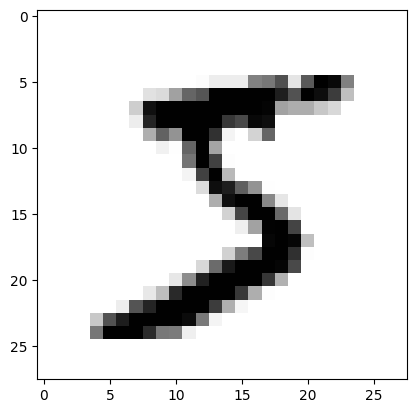

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,914 (796.54 KB)

 Trainable params: 203,914 (796.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 49ms/step - accuracy: 0.8354 - loss: 0.4987 - val_accuracy: 0.9859 - val_loss: 0.0435
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.9761 - loss: 0.0870 - val_accuracy: 0.9891 - val_loss: 0.0340
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 51ms/step - accuracy: 0.9827 - loss: 0.0609 - val_accuracy: 0.9908 - val_loss: 0.0270
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9859 - loss: 0.0498 - val_accuracy: 0.9916 - val_loss: 0.0269
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 48ms/step - accuracy: 0.9889 - loss: 0.0400 - val_accuracy: 0.9925 - val_loss: 0.0280
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9905 - loss: 0.0335
Test accuracy: 0.9925000071525574


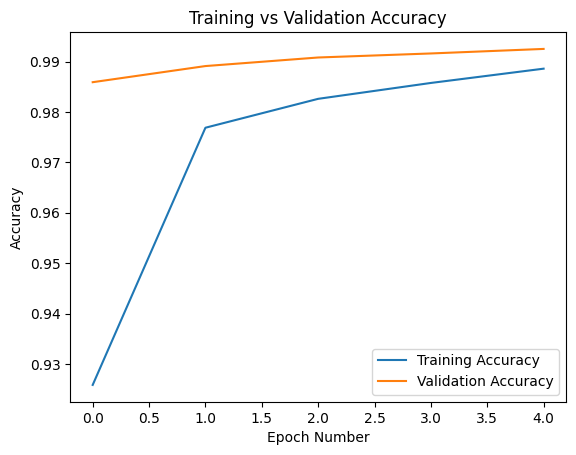

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to include the channel dimension for grayscale images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Print the shapes
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display the first image in the training dataset
plt.imshow(x_train[0].reshape(28, 28), cmap='binary')
plt.show()

# Build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding="valid", name="Conv1"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="Pool1"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same", name="Conv2"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="Pool2"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same", name="Conv3"))
model.add(Flatten(name="Flatten"))
model.add(Dense(64, activation='relu', name="Dense1"))
model.add(Dropout(0.5, name="Dropout"))  # Dropout Layer (Regularization)
model.add(Dense(10, activation='softmax', name="Output"))

# Print the summary of the model
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training vs validation accuracy
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
